### Training MLP-models

Linn Alexandra Emhjellen, 2021. 

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

from sklearn.metrics import recall_score,roc_curve,auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns

In [15]:
train_X = pd.read_excel('ML_training_features.xlsx')
train_y = pd.read_excel('ML_training_target.xlsx')

In [16]:
validation_X = pd.read_excel('ML_validation_features.xlsx')
validation_y = pd.read_excel('ML_validation_target.xlsx')

In [17]:
validation_y = validation_y['ReleaseArea']
train_y = train_y['ReleaseArea']

In [18]:
best_params_MLP = pd.read_excel('MLP_best_params_RandomSearch.xlsx')
best_params_MLP = best_params_MLP.drop(columns = 'Unnamed: 0')

In [19]:
best_param_grid = best_params_MLP.to_dict(orient = 'records')

In [20]:
best_param_grid

[{'solver': 'adam', 'hidden_layer_sizes': 37, 'alpha': 0.0},
 {'solver': 'lbfgs', 'hidden_layer_sizes': 62, 'alpha': 0.5},
 {'solver': 'lbfgs', 'hidden_layer_sizes': 50, 'alpha': 1.0},
 {'solver': 'adam', 'hidden_layer_sizes': 53, 'alpha': 1.0},
 {'solver': 'adam', 'hidden_layer_sizes': 54, 'alpha': 0.0},
 {'solver': 'adam', 'hidden_layer_sizes': 61, 'alpha': 0.5},
 {'solver': 'adam', 'hidden_layer_sizes': 49, 'alpha': 0.5},
 {'solver': 'adam', 'hidden_layer_sizes': 45, 'alpha': 0.0}]

In [21]:
train_X['Distance_to_roads']

0         836.480713
1         685.930054
2        1726.991577
3         111.803398
4         538.516479
            ...     
29817    2197.908203
29818     452.769257
29819    2962.785889
29820    3012.573730
29821    3483.231201
Name: Distance_to_roads, Length: 29822, dtype: float64

In [22]:
# feature combinations
p1 = ['Slope']

p2 = ['Slope','Elevation']

p3 = ['Slope','North','East','North East','North West','South','South East','South West','West']

p4 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI','Distance_to_roads']

p5 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads']

p6 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI']

p7 = ['Elevation','North','East','North East','North West','South','South East','South West','West','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads']

p8 = ['Slope','Elevation','North','East','North East','North West','South','South East','South West','West','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads',
      'Granite','Granodiorite','Tonalite','Trondhjemite','Syenite','Monzonite','Monzodiorite','Quartz diorite','Diorite','Gabbro','Norite','Peridotite','Pyroksenite','Charnockite','Mangerite','Anorthosite','Mafic dyke (Diabase, Dolerite)','Pegmatite/aplite','Felsic volcanic rock','Rhyolite','Dacite','Intermediate volcanic rock','Andesite','Mafic volcanic rock','Basalt',
                  'Pyroclastic rock','Volcanic breccia','Siltstone','Sandstone','Greywacke','Arkose','Konglomerate','Sedimentary breccia','Limestone','Tuffite','Shale','Phyllite','Mica schist','Garnet mica schist','Calcareous phyllite','Calcareous mica schist','Amphibole schist','Graphitic schist','Calcite marble',
                 'Metasandstone','Metagreywacke','Meta-arkose','Quartzite','Quartz schist','Mica gneiss','Calc-silicate rock','Amphibole gneiss','Granitic gneiss','Granodioritic gneiss','Tonalitic gneiss','Quartz dioritic gneiss','Monzonitic gneiss','Dioritic gneis','Orthopyroxene gneiss','Migmatite','Augengneiss',
                    'Banded gneiss','Greenschist','Greenstone','Amphibolite','Metagabbro','Eclogite','Serpentinite','Mylonite/Phyllonite','Cataclasite']

feature_combinations = [p1,p2,p3,p4,p5,p6,p7,p8]

In [23]:
#clf_mlp = MLPClassifier(hidden_layer_sizes=best_params_MLP.iloc[1][1], solver=best_params_MLP.iloc[1][0], alpha=best_params_MLP.iloc[1][2], max_iter=200,verbose=3)


In [24]:
#best_param_grid[0]["hidden_layer_sizes"]

Iteration 1, loss = 0.44452890
Iteration 2, loss = 0.22328555
Iteration 3, loss = 0.17387520
Iteration 4, loss = 0.16318544
Iteration 5, loss = 0.16020081
Iteration 6, loss = 0.15906919
Iteration 7, loss = 0.15843653
Iteration 8, loss = 0.15797384
Iteration 9, loss = 0.15760658
Iteration 10, loss = 0.15730770
Iteration 11, loss = 0.15707473
Iteration 12, loss = 0.15688242
Iteration 13, loss = 0.15673433
Iteration 14, loss = 0.15662019
Iteration 15, loss = 0.15660796
Iteration 16, loss = 0.15646407
Iteration 17, loss = 0.15643931
Iteration 18, loss = 0.15634715
Iteration 19, loss = 0.15631822
Iteration 20, loss = 0.15630637
Iteration 21, loss = 0.15621841
Iteration 22, loss = 0.15629388
Iteration 23, loss = 0.15629925
Iteration 24, loss = 0.15625167
Iteration 25, loss = 0.15635004
Iteration 26, loss = 0.15622942
Iteration 27, loss = 0.15616594
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.83657723
Iteration 2, loss = 0.43

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

Iteration 1, loss = 0.40002197
Iteration 2, loss = 0.22556571
Iteration 3, loss = 0.19409110
Iteration 4, loss = 0.18384145
Iteration 5, loss = 0.17879054
Iteration 6, loss = 0.17592298
Iteration 7, loss = 0.17378633
Iteration 8, loss = 0.17248789
Iteration 9, loss = 0.17149372
Iteration 10, loss = 0.17088552
Iteration 11, loss = 0.17038425
Iteration 12, loss = 0.17010855
Iteration 13, loss = 0.16980326
Iteration 14, loss = 0.16963290
Iteration 15, loss = 0.16923143
Iteration 16, loss = 0.16918552
Iteration 17, loss = 0.16924894
Iteration 18, loss = 0.16904394
Iteration 19, loss = 0.16888879
Iteration 20, loss = 0.16882843
Iteration 21, loss = 0.16891398
Iteration 22, loss = 0.16864840
Iteration 23, loss = 0.16849817
Iteration 24, loss = 0.16864737
Iteration 25, loss = 0.16852088
Iteration 26, loss = 0.16853391
Iteration 27, loss = 0.16840941
Iteration 28, loss = 0.16837605
Iteration 29, loss = 0.16834216
Iteration 30, loss = 0.16835129
Iteration 31, loss = 0.16836871
Iteration 32, los

Iteration 32, loss = 0.17073676
Iteration 33, loss = 0.17091914
Iteration 34, loss = 0.17076631
Iteration 35, loss = 0.17086523
Iteration 36, loss = 0.17062565
Iteration 37, loss = 0.17079122
Iteration 38, loss = 0.17097250
Iteration 39, loss = 0.17081855
Iteration 40, loss = 0.17068889
Iteration 41, loss = 0.17082950
Iteration 42, loss = 0.17089264
Iteration 43, loss = 0.17087647
Iteration 44, loss = 0.17059411
Iteration 45, loss = 0.17064632
Iteration 46, loss = 0.17070901
Iteration 47, loss = 0.17070386
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45239132
Iteration 2, loss = 0.21041518
Iteration 3, loss = 0.16315757
Iteration 4, loss = 0.14804698
Iteration 5, loss = 0.14160004
Iteration 6, loss = 0.13854905
Iteration 7, loss = 0.13667564
Iteration 8, loss = 0.13508341
Iteration 9, loss = 0.13386785
Iteration 10, loss = 0.13272338
Iteration 11, loss = 0.13176390
Iteration 12, loss = 0.13088756
Iteration 13, loss = 0.

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.45303735
Iteration 2, loss = 0.22409716
Iteration 3, loss = 0.17055718
Iteration 4, loss = 0.15159673
Iteration 5, loss = 0.14299066
Iteration 6, loss = 0.13851904
Iteration 7, loss = 0.13557239
Iteration 8, loss = 0.13393690
Iteration 9, loss = 0.13235923
Iteration 10, loss = 0.13138904
Iteration 11, loss = 0.13046654
Iteration 12, loss = 0.12976987
Iteration 13, loss = 0.12908267
Iteration 14, loss = 0.12840553
Iteration 15, loss = 0.12778100
Iteration 16, loss = 0.12707128
Iteration 17, loss = 0.12660295
Iteration 18, loss = 0.12587652
Iteration 19, loss = 0.12550025
Iteration 20, loss = 0.12488876
Iteration 21, loss = 0.12422215
Iteration 22, loss = 0.12371674
Iteration 23, loss = 0.12333871
Iteration 24, loss = 0.12301810
Iteration 25, loss = 0.12224313
Iteration 26, loss = 0.12203821
Iteration 27, loss = 0.12163388
Iteration 28, loss = 0.12100431
Iteration 29, loss = 0.12080910
Iteration 30, loss = 0.12020362
Iteration 31, loss = 0.11986989
Iteration 32, los

Iteration 67, loss = 0.11248912
Iteration 68, loss = 0.11243862
Iteration 69, loss = 0.11239758
Iteration 70, loss = 0.11231258
Iteration 71, loss = 0.11214003
Iteration 72, loss = 0.11207819
Iteration 73, loss = 0.11188670
Iteration 74, loss = 0.11162668
Iteration 75, loss = 0.11181713
Iteration 76, loss = 0.11168795
Iteration 77, loss = 0.11149584
Iteration 78, loss = 0.11129316
Iteration 79, loss = 0.11133163
Iteration 80, loss = 0.11129946
Iteration 81, loss = 0.11096568
Iteration 82, loss = 0.11081829
Iteration 83, loss = 0.11087679
Iteration 84, loss = 0.11076413
Iteration 85, loss = 0.11061028
Iteration 86, loss = 0.11039676
Iteration 87, loss = 0.11031885
Iteration 88, loss = 0.11027457
Iteration 89, loss = 0.11021639
Iteration 90, loss = 0.11002455
Iteration 91, loss = 0.10996126
Iteration 92, loss = 0.10998640
Iteration 93, loss = 0.10974135
Iteration 94, loss = 0.10961437
Iteration 95, loss = 0.10965513
Iteration 96, loss = 0.10943627
Iteration 97, loss = 0.10937105
Iteratio

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.21312288
Iteration 3, loss = 0.16471515
Iteration 4, loss = 0.14919099
Iteration 5, loss = 0.14234791
Iteration 6, loss = 0.13877903
Iteration 7, loss = 0.13675291
Iteration 8, loss = 0.13523352
Iteration 9, loss = 0.13404882
Iteration 10, loss = 0.13334138
Iteration 11, loss = 0.13240239
Iteration 12, loss = 0.13147517
Iteration 13, loss = 0.13103513
Iteration 14, loss = 0.13032362
Iteration 15, loss = 0.12948403
Iteration 16, loss = 0.12905410
Iteration 17, loss = 0.12832110
Iteration 18, loss = 0.12780589
Iteration 19, loss = 0.12720819
Iteration 20, loss = 0.12672311
Iteration 21, loss = 0.12611176
Iteration 22, loss = 0.12557959
Iteration 23, loss = 0.12522398
Iteration 24, loss = 0.12473524
Iteration 25, loss = 0.12432284
Iteration 26, loss = 0.12393449
Iteration 27, loss = 0.12373290
Iteration 28, loss = 0.12299406
Iteration 29, loss = 0.12266861
Iteration 30, loss = 0.12233833
Iteration 31, loss = 0.12187604
Iteration 32, loss = 0.12157841
Iteration 33, lo

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.16907234
Iteration 4, loss = 0.15103861
Iteration 5, loss = 0.14251692
Iteration 6, loss = 0.13757045
Iteration 7, loss = 0.13445143
Iteration 8, loss = 0.13238792
Iteration 9, loss = 0.13067777
Iteration 10, loss = 0.12931278
Iteration 11, loss = 0.12820877
Iteration 12, loss = 0.12737787
Iteration 13, loss = 0.12635235
Iteration 14, loss = 0.12575872
Iteration 15, loss = 0.12493695
Iteration 16, loss = 0.12425787
Iteration 17, loss = 0.12356554
Iteration 18, loss = 0.12305168
Iteration 19, loss = 0.12244016
Iteration 20, loss = 0.12179726
Iteration 21, loss = 0.12144891
Iteration 22, loss = 0.12083588
Iteration 23, loss = 0.12022949
Iteration 24, loss = 0.11965735
Iteration 25, loss = 0.11934519
Iteration 26, loss = 0.11910494
Iteration 27, loss = 0.11862690
Iteration 28, loss = 0.11813589
Iteration 29, loss = 0.11771117
Iteration 30, loss = 0.11737759
Iteration 31, loss = 0.11692505
Iteration 32, loss = 0.11663399
Iteration 33, loss = 0.11623348
Iteration 34, l

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 3, loss = 0.17285677
Iteration 4, loss = 0.15508484
Iteration 5, loss = 0.14700603
Iteration 6, loss = 0.14281436
Iteration 7, loss = 0.14016648
Iteration 8, loss = 0.13828734
Iteration 9, loss = 0.13689874
Iteration 10, loss = 0.13572406
Iteration 11, loss = 0.13466085
Iteration 12, loss = 0.13402330
Iteration 13, loss = 0.13295228
Iteration 14, loss = 0.13222453
Iteration 15, loss = 0.13186971
Iteration 16, loss = 0.13103585
Iteration 17, loss = 0.13044301
Iteration 18, loss = 0.13002291
Iteration 19, loss = 0.12945503
Iteration 20, loss = 0.12903636
Iteration 21, loss = 0.12878532
Iteration 22, loss = 0.12805903
Iteration 23, loss = 0.12765791
Iteration 24, loss = 0.12740762
Iteration 25, loss = 0.12687180
Iteration 26, loss = 0.12639626
Iteration 27, loss = 0.12606166
Iteration 28, loss = 0.12556114
Iteration 29, loss = 0.12499008
Iteration 30, loss = 0.12444538
Iteration 31, loss = 0.12407139
Iteration 32, loss = 0.12387996
Iteration 33, loss = 0.12331564
Iteration 34, 

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.20769968
Iteration 3, loss = 0.17803457
Iteration 4, loss = 0.17133328
Iteration 5, loss = 0.16846607
Iteration 6, loss = 0.16705306
Iteration 7, loss = 0.16603707
Iteration 8, loss = 0.16529249
Iteration 9, loss = 0.16478644
Iteration 10, loss = 0.16422609
Iteration 11, loss = 0.16392646
Iteration 12, loss = 0.16370566
Iteration 13, loss = 0.16349644
Iteration 14, loss = 0.16330080
Iteration 15, loss = 0.16300603
Iteration 16, loss = 0.16287944
Iteration 17, loss = 0.16292779
Iteration 18, loss = 0.16278361
Iteration 19, loss = 0.16267234
Iteration 20, loss = 0.16283068
Iteration 21, loss = 0.16267747
Iteration 22, loss = 0.16264629
Iteration 23, loss = 0.16244627
Iteration 24, loss = 0.16248307
Iteration 25, loss = 0.16253311
Iteration 26, loss = 0.16255505
Iteration 27, loss = 0.16246021
Iteration 28, loss = 0.16260915
Iteration 29, loss = 0.16238806
Iteration 30, loss = 0.16235877
Iteration 31, loss = 0.16236607
Iteration 32, loss = 0.16244290
Iteration 33, lo

Iteration 33, loss = 0.16518004
Iteration 34, loss = 0.16517970
Iteration 35, loss = 0.16504829
Iteration 36, loss = 0.16501313
Iteration 37, loss = 0.16494576
Iteration 38, loss = 0.16502154
Iteration 39, loss = 0.16491320
Iteration 40, loss = 0.16493169
Iteration 41, loss = 0.16495386
Iteration 42, loss = 0.16495903
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50449458
Iteration 2, loss = 0.39495288
Iteration 3, loss = 0.35073161
Iteration 4, loss = 0.32623346
Iteration 5, loss = 0.31339044
Iteration 6, loss = 0.30504772
Iteration 7, loss = 0.29939047
Iteration 8, loss = 0.29500214
Iteration 9, loss = 0.29157405
Iteration 10, loss = 0.28876596
Iteration 11, loss = 0.28616210
Iteration 12, loss = 0.28394683
Iteration 13, loss = 0.28204051
Iteration 14, loss = 0.28027748
Iteration 15, loss = 0.27884121
Iteration 16, loss = 0.27772452
Iteration 17, loss = 0.27668256
Iteration 18, loss = 0.27588104
Iteration 19, loss = 0.

Iteration 73, loss = 0.26958293
Iteration 74, loss = 0.26931549
Iteration 75, loss = 0.26937668
Iteration 76, loss = 0.26969695
Iteration 77, loss = 0.26929803
Iteration 78, loss = 0.26960586
Iteration 79, loss = 0.26914428
Iteration 80, loss = 0.26923109
Iteration 81, loss = 0.26939969
Iteration 82, loss = 0.26904435
Iteration 83, loss = 0.26955476
Iteration 84, loss = 0.26911481
Iteration 85, loss = 0.26946499
Iteration 86, loss = 0.26931184
Iteration 87, loss = 0.26938203
Iteration 88, loss = 0.26942576
Iteration 89, loss = 0.26917449
Iteration 90, loss = 0.26935259
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51460319
Iteration 2, loss = 0.40262787
Iteration 3, loss = 0.35860269
Iteration 4, loss = 0.33234630
Iteration 5, loss = 0.31784477
Iteration 6, loss = 0.30909378
Iteration 7, loss = 0.30275711
Iteration 8, loss = 0.29802372
Iteration 9, loss = 0.29418904
Iteration 10, loss = 0.29160507
Iteration 11, loss = 0.

Iteration 34, loss = 0.27498623
Iteration 35, loss = 0.27474572
Iteration 36, loss = 0.27433252
Iteration 37, loss = 0.27400734
Iteration 38, loss = 0.27431031
Iteration 39, loss = 0.27417102
Iteration 40, loss = 0.27380689
Iteration 41, loss = 0.27375729
Iteration 42, loss = 0.27355636
Iteration 43, loss = 0.27331636
Iteration 44, loss = 0.27324682
Iteration 45, loss = 0.27327745
Iteration 46, loss = 0.27298387
Iteration 47, loss = 0.27296809
Iteration 48, loss = 0.27273183
Iteration 49, loss = 0.27262725
Iteration 50, loss = 0.27241846
Iteration 51, loss = 0.27280572
Iteration 52, loss = 0.27238570
Iteration 53, loss = 0.27265243
Iteration 54, loss = 0.27245209
Iteration 55, loss = 0.27264599
Iteration 56, loss = 0.27218879
Iteration 57, loss = 0.27233773
Iteration 58, loss = 0.27195353
Iteration 59, loss = 0.27203272
Iteration 60, loss = 0.27210422
Iteration 61, loss = 0.27200907
Iteration 62, loss = 0.27178121
Iteration 63, loss = 0.27187129
Iteration 64, loss = 0.27156662
Iteratio

Iteration 181, loss = 0.04568633
Iteration 182, loss = 0.04596120
Iteration 183, loss = 0.04572443
Iteration 184, loss = 0.04587603
Iteration 185, loss = 0.04544647
Iteration 186, loss = 0.04550003
Iteration 187, loss = 0.04534592
Iteration 188, loss = 0.04544602
Iteration 189, loss = 0.04547554
Iteration 190, loss = 0.04524254
Iteration 191, loss = 0.04527136
Iteration 192, loss = 0.04560738
Iteration 193, loss = 0.04535178
Iteration 194, loss = 0.04506576
Iteration 195, loss = 0.04511555
Iteration 196, loss = 0.04526189
Iteration 197, loss = 0.04524345
Iteration 198, loss = 0.04499479
Iteration 199, loss = 0.04486725
Iteration 200, loss = 0.04467864


C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.47238940
Iteration 2, loss = 0.21001097
Iteration 3, loss = 0.14787328
Iteration 4, loss = 0.12066279
Iteration 5, loss = 0.10810439
Iteration 6, loss = 0.10105274
Iteration 7, loss = 0.09678899
Iteration 8, loss = 0.09386608
Iteration 9, loss = 0.09196042
Iteration 10, loss = 0.08990587
Iteration 11, loss = 0.08866609
Iteration 12, loss = 0.08724086
Iteration 13, loss = 0.08644593
Iteration 14, loss = 0.08542169
Iteration 15, loss = 0.08416655
Iteration 16, loss = 0.08356750
Iteration 17, loss = 0.08268570
Iteration 18, loss = 0.08184649
Iteration 19, loss = 0.08116569
Iteration 20, loss = 0.08047069
Iteration 21, loss = 0.07976444
Iteration 22, loss = 0.07908286
Iteration 23, loss = 0.07865933
Iteration 24, loss = 0.07792774
Iteration 25, loss = 0.07721950
Iteration 26, loss = 0.07673243
Iteration 27, loss = 0.07605623
Iteration 28, loss = 0.07559370
Iteration 29, loss = 0.07507686
Iteration 30, loss = 0.07434351
Iteration 31, loss = 0.07392282
Iteration 32, los

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 0.23577348
Iteration 3, loss = 0.16369729
Iteration 4, loss = 0.12849205
Iteration 5, loss = 0.11247070
Iteration 6, loss = 0.10429430
Iteration 7, loss = 0.09940129
Iteration 8, loss = 0.09604110
Iteration 9, loss = 0.09365330
Iteration 10, loss = 0.09160672
Iteration 11, loss = 0.08986262
Iteration 12, loss = 0.08866028
Iteration 13, loss = 0.08736489
Iteration 14, loss = 0.08605855
Iteration 15, loss = 0.08502279
Iteration 16, loss = 0.08447469
Iteration 17, loss = 0.08328973
Iteration 18, loss = 0.08245556
Iteration 19, loss = 0.08170338
Iteration 20, loss = 0.08110266
Iteration 21, loss = 0.08029581
Iteration 22, loss = 0.07971889
Iteration 23, loss = 0.07912452
Iteration 24, loss = 0.07873490
Iteration 25, loss = 0.07811693
Iteration 26, loss = 0.07707380
Iteration 27, loss = 0.07666290
Iteration 28, loss = 0.07638212
Iteration 29, loss = 0.07570862
Iteration 30, loss = 0.07517277
Iteration 31, loss = 0.07485060
Iteration 32, loss = 0.07430633
Iteration 33, l

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.22661942
Iteration 3, loss = 0.16131667
Iteration 4, loss = 0.12782436
Iteration 5, loss = 0.11159797
Iteration 6, loss = 0.10298861
Iteration 7, loss = 0.09801251
Iteration 8, loss = 0.09452959
Iteration 9, loss = 0.09185050
Iteration 10, loss = 0.08974080
Iteration 11, loss = 0.08793595
Iteration 12, loss = 0.08658505
Iteration 13, loss = 0.08513319
Iteration 14, loss = 0.08386584
Iteration 15, loss = 0.08260207
Iteration 16, loss = 0.08171091
Iteration 17, loss = 0.08067843
Iteration 18, loss = 0.07958121
Iteration 19, loss = 0.07879825
Iteration 20, loss = 0.07807200
Iteration 21, loss = 0.07717324
Iteration 22, loss = 0.07657620
Iteration 23, loss = 0.07566367
Iteration 24, loss = 0.07506852
Iteration 25, loss = 0.07420620
Iteration 26, loss = 0.07375193
Iteration 27, loss = 0.07292127
Iteration 28, loss = 0.07267968
Iteration 29, loss = 0.07155571
Iteration 30, loss = 0.07163140
Iteration 31, loss = 0.07077698
Iteration 32, loss = 0.07020831
Iteration 33, lo

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.34378965
Iteration 2, loss = 0.18235037
Iteration 3, loss = 0.13653124
Iteration 4, loss = 0.11634753
Iteration 5, loss = 0.10666203
Iteration 6, loss = 0.10110105
Iteration 7, loss = 0.09739567
Iteration 8, loss = 0.09457620
Iteration 9, loss = 0.09251103
Iteration 10, loss = 0.09054581
Iteration 11, loss = 0.08909052
Iteration 12, loss = 0.08784565
Iteration 13, loss = 0.08671204
Iteration 14, loss = 0.08529699
Iteration 15, loss = 0.08429899
Iteration 16, loss = 0.08292749
Iteration 17, loss = 0.08251586
Iteration 18, loss = 0.08140570
Iteration 19, loss = 0.08051572
Iteration 20, loss = 0.07990736
Iteration 21, loss = 0.07921593
Iteration 22, loss = 0.07852573
Iteration 23, loss = 0.07764788
Iteration 24, loss = 0.07703029
Iteration 25, loss = 0.07642426
Iteration 26, loss = 0.07593811
Iteration 27, loss = 0.07512393
Iteration 28, loss = 0.07480903
Iteration 29, loss = 0.07409567
Iteration 30, loss = 0.07369346
Iteration 31, loss = 0.07326388
Iteration 32, los

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.21159554
Iteration 3, loss = 0.15154236
Iteration 4, loss = 0.12387241
Iteration 5, loss = 0.11092880
Iteration 6, loss = 0.10402894
Iteration 7, loss = 0.09942283
Iteration 8, loss = 0.09635958
Iteration 9, loss = 0.09392643
Iteration 10, loss = 0.09141943
Iteration 11, loss = 0.09000845
Iteration 12, loss = 0.08869311
Iteration 13, loss = 0.08724646
Iteration 14, loss = 0.08618655
Iteration 15, loss = 0.08509944
Iteration 16, loss = 0.08442341
Iteration 17, loss = 0.08338630
Iteration 18, loss = 0.08255092
Iteration 19, loss = 0.08185355
Iteration 20, loss = 0.08129812
Iteration 21, loss = 0.08082071
Iteration 22, loss = 0.07991900
Iteration 23, loss = 0.07973043
Iteration 24, loss = 0.07915062
Iteration 25, loss = 0.07850903
Iteration 26, loss = 0.07830904
Iteration 27, loss = 0.07747879
Iteration 28, loss = 0.07691516
Iteration 29, loss = 0.07670182
Iteration 30, loss = 0.07623289
Iteration 31, loss = 0.07587054
Iteration 32, loss = 0.07523723
Iteration 33, lo

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


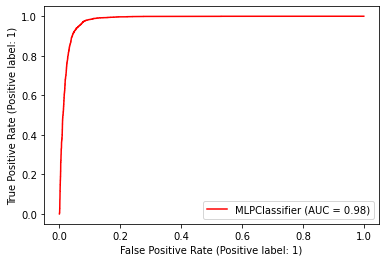

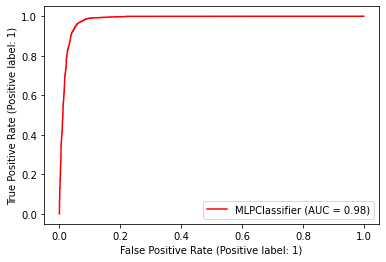

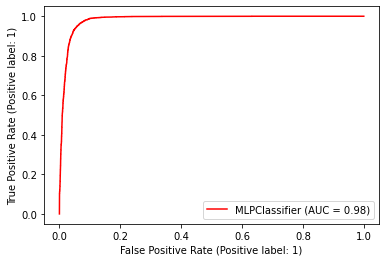

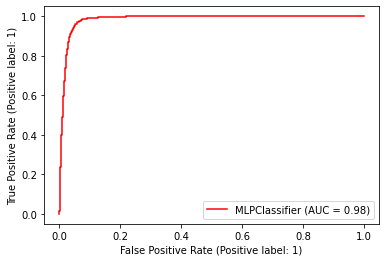

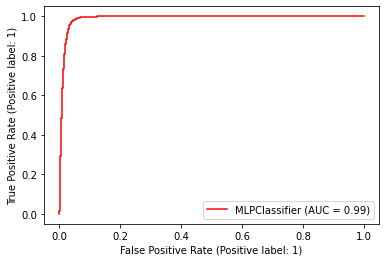

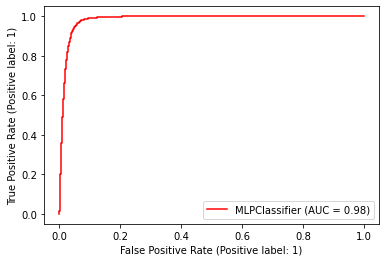

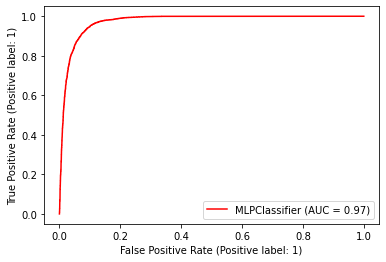

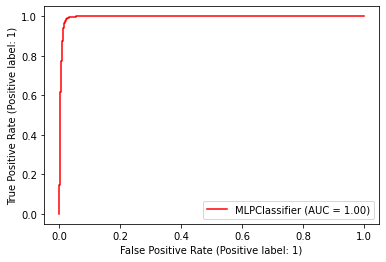

In [25]:
clf_mlp_models = []
pred_release_training_MLP = []
pred_release_testing_MLP = []
pred_release_prob_MLP = []

confusion_matrixes_training = []
confusion_matrixes_test = []
#feature_importances = []

f1_scores = []
ROC_curves = []
CV_scores = []
R2_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []



n = 0
for i in feature_combinations:
    
    X_train = train_X[i]
    X_test = validation_X[i]

    AUTO_SCALING = True
    if AUTO_SCALING:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_training = scaler.transform(X_train)
        X_testing = scaler.transform(X_test)
       
    #nnetwork = MLPClassifier(max_iter=1000)    
   
    clf_mlp = MLPClassifier(solver = best_param_grid[n]["solver"], hidden_layer_sizes = best_param_grid[n]["hidden_layer_sizes"], alpha = best_param_grid[n]["alpha"], max_iter=200,verbose=3)
    clf_mlp.fit(X_training, train_y)
    clf_mlp_models.append(clf_mlp)
    
    pred_release_at_training_MLP = clf_mlp.predict(X_training)
    pred_release_training_MLP.append(pred_release_at_training_MLP)
    
    pred_prob_MLP = clf_mlp.predict_proba(X_testing)
    pred_release_prob_MLP.append(pred_prob_MLP)
    
    pred_release_at_validation_MLP = clf_mlp.predict(X_testing)
    pred_release_testing_MLP.append(pred_release_at_validation_MLP)
    
    c_m = confusion_matrix(train_y,pred_release_at_training_MLP)
    confusion_matrixes_training.append(c_m)
    
    c_m_v = confusion_matrix(validation_y,pred_release_at_validation_MLP)
    confusion_matrixes_test.append(c_m_v)
    
    f1 = f1_score(validation_y, pred_release_at_validation_MLP, average='macro')
    f1_scores.append(f1)
    
    CV = cross_val_score(estimator= clf_mlp, X=X_training, y=train_y)
    CV_scores.append(CV)
    
    CLF_ROC = plot_roc_curve(clf_mlp, X_testing, validation_y, color = 'r')
    ROC_curves.append(CLF_ROC)
    
    r2 = r2_score(validation_y, pred_release_at_validation_MLP)
    R2_scores.append(r2)
    
    acc = accuracy_score(validation_y, pred_release_at_validation_MLP)
    accuracy_scores.append(acc)
    
    precision = precision_score(validation_y, pred_release_at_validation_MLP)
    precision_scores.append(precision)
    
    recall = recall_score(validation_y, pred_release_at_validation_MLP)
    recall_scores.append(recall)
    
    roc_auc = roc_auc_score(validation_y, pred_release_at_validation_MLP)
    roc_auc_scores.append(roc_auc)
    
    n += 1

In [12]:
roc_auc_scores = pd.DataFrame(roc_auc_scores)
roc_auc_scores.to_excel('MLP_roc_auc_scores.xlsx')

In [13]:
f1_scores

[0.9347584849395298,
 0.9421821618515844,
 0.9378428520173236,
 0.9434316737955324,
 0.9583133159789907,
 0.9424137517354829,
 0.9044306498295012,
 0.9773161856663246]

In [13]:
# save models
joblib.dump(clf_mlp_models[0], "MLP_p1_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[1], "MLP_p2_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[2], "MLP_p3_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[3], "MLP_p4_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[4], "MLP_p5_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[5], "MLP_p6_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[6], "MLP_p7_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[7], "MLP_p8_Emhjellen2.joblib",compress=3)

# ../saved_models/RF_p6_Emhjellen2.joblib",compress=3)

['MLP_p8_Emhjellen2.joblib']

In [16]:
# plot of confusion matrixes from training
n = 0;
for i in confusion_matrixes_training:
    n += 1
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                i.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     i.flatten()/np.sum(i)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    plot = sns.heatmap(i, annot=labels, fmt='', cmap='Blues')
    plt.savefig('saved_figures_2/confusion_matrix_MLP_feature_combination_training'+ 'p'+ str(n) +'.png')
    plt.close()

In [17]:
# plot of confusion matrixes from test
n = 0;
for i in confusion_matrixes_test:
    n += 1
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                i.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     i.flatten()/np.sum(i)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    plot = sns.heatmap(i, annot=labels, fmt='', cmap='Blues')
    plt.savefig('saved_figures_2/confusion_matrix_MLP_feature_combination_validation'+ 'p'+ str(n) +'.png')
    plt.close()
    
    #plt.savefig('saved_figures/confusion_matrix_RF_feature_combination_validation'+ 'p'+ str(n) +'.png')

In [18]:
# bar plot of feature importances
#
#n = 0;
#for i in feature_importances:
#    n += 1
#    sns.barplot(x=i, y=i.index)
#    # Add labels to your graph
#    plt.xlabel('Feature Importance Score')
#    plt.ylabel('Features')
#    plt.title("Visualizing Important Features, Random Forest Classifier")
#    plt.savefig('saved_figures/feature_importances'+ 'p'+ str(n) +'.png')
#    plt.close()

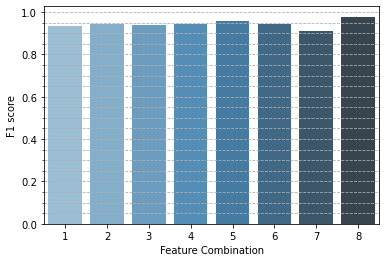

In [19]:
# bar plot of f1 scores

fig = sns.barplot(x=np.arange(1,9), y=f1_scores,palette="Blues_d")
    
plt.xlabel('Feature Combination')
plt.ylabel('F1 score')
plt.title("")
ticks = np.arange(0, 1, 0.05)
fig.set_yticks(ticks, minor=True)
fig.grid(which='both',axis='y',linestyle='dashed')
plt.rc('axes', axisbelow=True)
plt.savefig('saved_figures_2/f1_scores_MLP.png')
#plt.close()

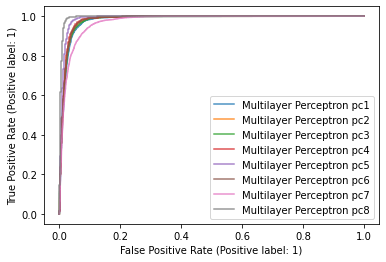

In [26]:
# plot of ROC curves

ax = plt.gca()
n = 0
for i in ROC_curves:
    n += 1
    i.plot(ax=ax, alpha=0.8, label = 'Multilayer Perceptron '+ 'pc'+ str(n))
plt.savefig('saved_figures_2/ROC_curve_feature_combinations_MLP_2.png')   

In [21]:
cv_scores_RF = pd.DataFrame(CV_scores)
cv_scores_RF.to_excel('MLP_CV_scores_training2.xlsx')

In [22]:
f1_scores_RF = pd.DataFrame(f1_scores)
f1_scores_RF.to_excel('MLP_F1_scores2.xlsx')

In [23]:
accuracy_scores_RF = pd.DataFrame(accuracy_scores)
accuracy_scores_RF.to_excel('MLP_accuracy_scores2.xlsx')

In [24]:
precision_scores_RF = pd.DataFrame(precision_scores)
precision_scores_RF.to_excel('MLP_precision_scores2.xlsx')

In [25]:
recall_scores_RF = pd.DataFrame(recall_scores)
recall_scores_RF.to_excel('MLP_recall_scores2.xlsx')

In [26]:
R2_scores_RF = pd.DataFrame(R2_scores)
R2_scores_RF.to_excel('MLP_R2_scores2.xlsx')

## Prediction results


In [30]:
validation_y = pd.read_excel('ML_validation_target.xlsx')

df_coor = validation_y[['POINT_X', 'POINT_Y']]

In [31]:
pred_release_prob_MLP

[array([[9.97470687e-01, 2.52931305e-03],
        [9.92388891e-01, 7.61110902e-03],
        [9.99954933e-01, 4.50666686e-05],
        ...,
        [9.97729349e-01, 2.27065067e-03],
        [9.99758734e-01, 2.41266042e-04],
        [5.75343437e-02, 9.42465656e-01]]),
 array([[9.95496170e-01, 4.50383045e-03],
        [9.96941832e-01, 3.05816818e-03],
        [9.99996681e-01, 3.31892368e-06],
        ...,
        [9.90598087e-01, 9.40191317e-03],
        [9.99900512e-01, 9.94875201e-05],
        [5.87574644e-02, 9.41242536e-01]]),
 array([[9.99260501e-01, 7.39498958e-04],
        [9.92834329e-01, 7.16567106e-03],
        [9.99999700e-01, 3.00463655e-07],
        ...,
        [9.98071849e-01, 1.92815056e-03],
        [9.99989059e-01, 1.09412156e-05],
        [7.29467907e-02, 9.27053209e-01]]),
 array([[9.91338430e-01, 8.66156964e-03],
        [9.75380167e-01, 2.46198328e-02],
        [9.99494463e-01, 5.05537141e-04],
        ...,
        [9.88260487e-01, 1.17395134e-02],
        [9.9855261

In [32]:
# extracting the values that are probability for rockfall, class 1

df_coor['MLP_prob_p1'] = pred_release_prob_MLP[0][:,1]
df_coor['MLP_prob_p2'] = pred_release_prob_MLP[1][:,1]
df_coor['MLP_prob_p3'] = pred_release_prob_MLP[2][:,1]
df_coor['MLP_prob_p4'] = pred_release_prob_MLP[3][:,1]
df_coor['MLP_prob_p5'] = pred_release_prob_MLP[4][:,1]
df_coor['MLP_prob_p6'] = pred_release_prob_MLP[5][:,1]
df_coor['MLP_prob_p7'] = pred_release_prob_MLP[6][:,1]
df_coor['MLP_prob_p8'] = pred_release_prob_MLP[7][:,1]

<ipython-input-32-361dda0d81ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coor['MLP_prob_p1'] = pred_release_prob_MLP[0][:,1]


In [33]:
df_coor['MLP_prediction_p1'] = pred_release_testing_MLP[0]
df_coor['MLP_prediction_p2'] = pred_release_testing_MLP[1]
df_coor['MLP_prediction_p3'] = pred_release_testing_MLP[2]
df_coor['MLP_prediction_p4'] = pred_release_testing_MLP[3]
df_coor['MLP_prediction_p5'] = pred_release_testing_MLP[4]
df_coor['MLP_prediction_p6'] = pred_release_testing_MLP[5]
df_coor['MLP_prediction_p7'] = pred_release_testing_MLP[6]
df_coor['MLP_prediction_p8'] = pred_release_testing_MLP[7]

In [34]:
#df_coor.to_excel('predition_results_validation_MLP2.xlsx')

In [ ]:
#df_coor = pd.read_excel('predition_results_validation_MLP2.xlsx')

In [37]:
df_coor['ReleaseArea'] = validation_y['ReleaseArea'] 

In [38]:
result1 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p1'].iloc[row] == 1:
        result1.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p1'].iloc[row] == 0:
        result1.append('TN')
    elif df_coor['MLP_prediction_p1'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result1.append('FP')
    elif df_coor['MLP_prediction_p1'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result1.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p1'] = result1

In [39]:
result2 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p2'].iloc[row] == 1:
        result2.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p2'].iloc[row] == 0:
        result2.append('TN')
    elif df_coor['MLP_prediction_p2'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result2.append('FP')
    elif df_coor['MLP_prediction_p2'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result2.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p2'] = result2

In [40]:
result3 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p3'].iloc[row] == 1:
        result3.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p3'].iloc[row] == 0:
        result3.append('TN')
    elif df_coor['MLP_prediction_p3'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result3.append('FP')
    elif df_coor['MLP_prediction_p3'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result3.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p3'] = result3

In [41]:
result4 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p4'].iloc[row] == 1:
        result4.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p4'].iloc[row] == 0:
        result4.append('TN')
    elif df_coor['MLP_prediction_p4'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result4.append('FP')
    elif df_coor['MLP_prediction_p4'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result4.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p4'] = result4

In [42]:
result5 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p5'].iloc[row] == 1:
        result5.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p5'].iloc[row] == 0:
        result5.append('TN')
    elif df_coor['MLP_prediction_p5'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result5.append('FP')
    elif df_coor['MLP_prediction_p5'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result5.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p5'] = result5

In [43]:
result6 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p6'].iloc[row] == 1:
        result6.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p6'].iloc[row] == 0:
        result6.append('TN')
    elif df_coor['MLP_prediction_p6'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result6.append('FP')
    elif df_coor['MLP_prediction_p6'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result6.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p6'] = result6

In [44]:
result7 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p7'].iloc[row] == 1:
        result7.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p7'].iloc[row] == 0:
        result7.append('TN')
    elif df_coor['MLP_prediction_p7'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result7.append('FP')
    elif df_coor['MLP_prediction_p7'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result7.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p7'] = result7

In [45]:
result8 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p8'].iloc[row] == 1:
        result8.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p8'].iloc[row] == 0:
        result8.append('TN')
    elif df_coor['MLP_prediction_p8'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result8.append('FP')
    elif df_coor['MLP_prediction_p8'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result8.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p8'] = result8

In [46]:
df_coor.to_excel('prediction_results_validation_MLP2.xlsx')